In [10]:
from sklearn.linear_model import LinearRegression
# Training data
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17], [18]]
# Create and fit the model
model = LinearRegression()
model.fit(X, y)
print 'A 12" pizza should cost: $%.2f' % model.predict([12])[0]
'A 12" pizza should cost: $13.68'

A 12" pizza should cost: $13.57


/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'A 12" pizza should cost: $13.68'

In [11]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print 'Predicted: %s, Target: %s' % (prediction, y_test[i])
    print 'R-squared: %.2f' % model.score(X_test, y_test)

Predicted: [ 10.0625], Target: [11]
R-squared: 0.77
Predicted: [ 10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [ 13.09375], Target: [15]
R-squared: 0.77
Predicted: [ 18.14583333], Target: [18]
R-squared: 0.77
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


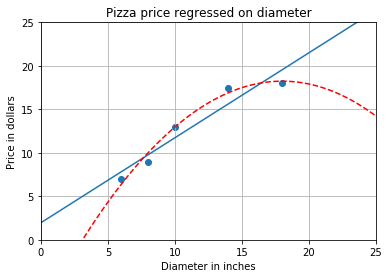

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple linear regression r-squared 0.809726797708
Quadratic regression r-squared 0.867544365635


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print X_train
print X_train_quadratic
print X_test
print X_test_quadratic
print 'Simple linear regression r-squared', regressor.score(X_test, y_test)
print 'Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test)